# Understanding Repetition Code Graph Decoding

In [4]:
from qiskit import *
import matplotlib.pyplot as plt
import networkx as nx
import random

from qiskit.ignis.verification.topological_codes import RepetitionCode
from qiskit.ignis.verification.topological_codes import GraphDecoder
from qiskit.ignis.verification.topological_codes import lookuptable_decoding, postselection_decoding

In [5]:
noise_model = get_noise(0.05,0.05)

In [6]:
d = 4
T = 2
code = RepetitionCode(d,T)

In [7]:
circuits = code.get_circuit_list()
job = execute( circuits, Aer.get_backend('qasm_simulator') )
raw_results = {}
for log in ['0','1']:
    raw_results[log] = job.result().get_counts(log)

In [8]:
raw_results['0']

{'0000 000 000': 1024}

In [9]:
results = code.process_results( raw_results )

In [10]:
results['0']

{'0 0  000 000 000': 1024}

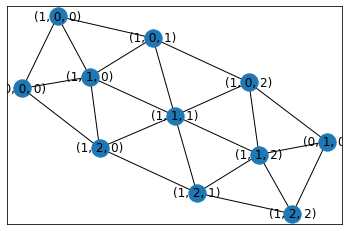

In [11]:
decoder = GraphDecoder(code)
nx.draw_networkx(decoder.S)
plt.plot()
plt.show()

In [12]:

for edge in decoder.S.edges:
    print(edge)

((0, 1, 0), (1, 0, 2))
((0, 1, 0), (1, 1, 2))
((0, 1, 0), (1, 2, 2))
((1, 0, 2), (1, 1, 2))
((1, 0, 2), (1, 0, 1))
((1, 0, 2), (1, 1, 1))
((1, 1, 2), (1, 2, 2))
((1, 1, 2), (1, 1, 1))
((1, 1, 2), (1, 2, 1))
((1, 0, 1), (1, 1, 1))
((1, 0, 1), (1, 0, 0))
((1, 0, 1), (1, 1, 0))
((1, 1, 1), (1, 2, 1))
((1, 1, 1), (1, 1, 0))
((1, 1, 1), (1, 2, 0))
((1, 0, 0), (1, 1, 0))
((1, 0, 0), (0, 0, 0))
((1, 1, 0), (1, 2, 0))
((1, 1, 0), (0, 0, 0))
((0, 0, 0), (1, 2, 0))
((1, 2, 2), (1, 2, 1))
((1, 2, 1), (1, 2, 0))


For edge ((0, 0, 0), (0, 1, 0)) the weight is -4


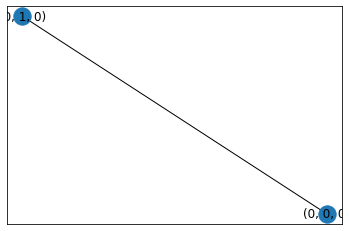

In [13]:
graph = decoder.make_error_graph('0 0  000 000 000')
for edge in graph['0'].edges:
    edge_info = graph['0'][edge[0]][edge[1]]
    print('For edge', edge, 'the weight is',edge_info['weight'])
nx.draw_networkx(graph['0'])
plt.plot()
plt.show()

For edge ((0, 0, 0), (0, 1, 0)) the weight is -4
For edge ((0, 0, 0), (1, 2, 2)) the weight is -3
For edge ((0, 1, 0), (1, 2, 2)) the weight is -1


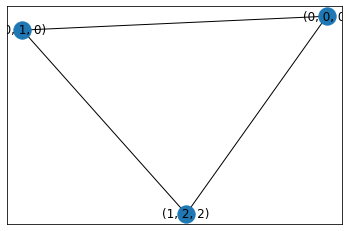

0 0


{'0': 0.0, '1': 0.0}

In [14]:
graph = decoder.make_error_graph('0 1  000 000 001')

for edge in graph['0'].edges:
    edge_info = graph['0'][edge[0]][edge[1]]
    print('For edge', edge, 'the weight is',edge_info['weight'])
    
nx.draw_networkx(graph['0'])
plt.plot()
plt.show()
print(decoder.matching('0 1  000 000 001'))
decoder.get_logical_prob(results)

For edge ((0, 0, 0), (0, 1, 0)) the weight is -4
For edge ((0, 0, 0), (1, 0, 0)) the weight is -1
For edge ((0, 0, 0), (1, 0, 1)) the weight is -2
For edge ((0, 0, 0), (1, 0, 2)) the weight is -3
For edge ((0, 0, 0), (1, 1, 0)) the weight is -1
For edge ((0, 0, 0), (1, 1, 1)) the weight is -2
For edge ((0, 0, 0), (1, 1, 2)) the weight is -3
For edge ((0, 0, 0), (1, 2, 0)) the weight is -1
For edge ((0, 0, 0), (1, 2, 1)) the weight is -2
For edge ((0, 0, 0), (1, 2, 2)) the weight is -3
For edge ((0, 1, 0), (1, 0, 0)) the weight is -3
For edge ((0, 1, 0), (1, 0, 1)) the weight is -2
For edge ((0, 1, 0), (1, 0, 2)) the weight is -1
For edge ((0, 1, 0), (1, 1, 0)) the weight is -3
For edge ((0, 1, 0), (1, 1, 1)) the weight is -2
For edge ((0, 1, 0), (1, 1, 2)) the weight is -1
For edge ((0, 1, 0), (1, 2, 0)) the weight is -3
For edge ((0, 1, 0), (1, 2, 1)) the weight is -2
For edge ((0, 1, 0), (1, 2, 2)) the weight is -1
For edge ((1, 0, 0), (1, 0, 1)) the weight is -1
For edge ((1, 0, 0),

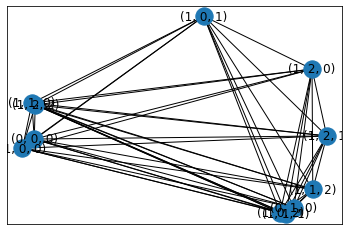

0 0


{'0': 0.0, '1': 0.0}

In [15]:
graph = decoder.make_error_graph('0 0  111 111 111')

for edge in graph['0'].edges:
    edge_info = graph['0'][edge[0]][edge[1]]
    print('For edge', edge, 'the weight is',edge_info['weight'])

nx.draw_networkx(graph['0'])
plt.plot()
plt.show()
print(decoder.matching('1 0  111 111 111'))
decoder.get_logical_prob(results)

In [16]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
import random

def get_noise(p_meas,p_gate):

    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) # single qubit gate error is applied to x gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates
        
    return noise_model

def get_raw_results(code,noise_model=None):

    circuits = code.get_circuit_list()
    raw_results = {}
    for log in range(2):
        job = execute( circuits[log], Aer.get_backend('qasm_simulator'), noise_model=noise_model)
        raw_results[str(log)] = job.result().get_counts(str(log))
    return raw_results

raw_results = get_raw_results(code, noise_model)
results = code.process_results( raw_results ) 
decoder.get_logical_prob(results)

{'0': 0.037109375, '1': 0.0390625}

In [18]:
results

{'0': {'0 1  000 111 000': 1,
  '0 0  001 110 100': 4,
  '0 1  100 101 000': 1,
  '1 0  000 001 101': 7,
  '0 0  001 001 000': 27,
  '1 1  000 001 100': 1,
  '0 0  000 110 000': 20,
  '0 0  110 101 000': 1,
  '0 0  010 100 000': 7,
  '0 1  000 001 011': 1,
  '1 0  000 100 011': 1,
  '1 0  101 101 100': 1,
  '0 1  010 010 010': 1,
  '1 1  000 111 100': 1,
  '0 0  101 000 110': 1,
  '0 0  000 101 101': 8,
  '1 0  001 001 010': 1,
  '0 1  000 010 011': 2,
  '0 0  110 110 000': 3,
  '1 0  000 010 110': 2,
  '0 0  001 011 010': 3,
  '0 1  001 001 111': 2,
  '0 1  001 011 101': 1,
  '0 0  100 010 000': 1,
  '0 0  010 101 001': 3,
  '0 1  000 110 001': 1,
  '0 1  010 000 011': 1,
  '0 1  000 100 101': 4,
  '0 0  001 100 101': 2,
  '0 0  000 010 010': 41,
  '0 0  001 010 000': 11,
  '0 0  100 101 100': 1,
  '0 0  000 000 110': 29,
  '0 0  010 011 010': 4,
  '1 0  000 001 110': 1,
  '0 1  010 011 000': 1,
  '0 0  000 100 100': 41,
  '0 0  100 100 011': 1,
  '1 0  010 100 100': 5,
  '1 0  001 10

In [22]:
for r in results:
    for string in results[r]:
        print(results[r][string])
        

{'0 1  000 111 000': 1, '0 0  001 110 100': 4, '0 1  100 101 000': 1, '1 0  000 001 101': 7, '0 0  001 001 000': 27, '1 1  000 001 100': 1, '0 0  000 110 000': 20, '0 0  110 101 000': 1, '0 0  010 100 000': 7, '0 1  000 001 011': 1, '1 0  000 100 011': 1, '1 0  101 101 100': 1, '0 1  010 010 010': 1, '1 1  000 111 100': 1, '0 0  101 000 110': 1, '0 0  000 101 101': 8, '1 0  001 001 010': 1, '0 1  000 010 011': 2, '0 0  110 110 000': 3, '1 0  000 010 110': 2, '0 0  001 011 010': 3, '0 1  001 001 111': 2, '0 1  001 011 101': 1, '0 0  100 010 000': 1, '0 0  010 101 001': 3, '0 1  000 110 001': 1, '0 1  010 000 011': 1, '0 1  000 100 101': 4, '0 0  001 100 101': 2, '0 0  000 010 010': 41, '0 0  001 010 000': 11, '0 0  100 101 100': 1, '0 0  000 000 110': 29, '0 0  010 011 010': 4, '1 0  000 001 110': 1, '0 1  010 011 000': 1, '0 0  000 100 100': 41, '0 0  100 100 011': 1, '1 0  010 100 100': 5, '1 0  001 101 011': 1, '1 1  001 100 101': 1, '0 1  000 000 001': 20, '1 1  000 011 110': 1, '0 